In [1]:
pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 7.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import layers

2024-08-01 05:49:10.403026: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 05:49:10.403096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 05:49:10.403119: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 05:49:10.410912: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, MaxPool1D, Concatenate, Activation, Add, GlobalAveragePooling1D, \
    Dense, LSTM, TimeDistributed, Reshape, BatchNormalization, Bidirectional, Flatten, MaxPooling1D, Dropout, \
    SeparableConv1D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy, Reduction
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, BatchNormalization, Activation, Add, Concatenate,
                                     GlobalAveragePooling1D, Dense, Dropout, LayerNormalization, MultiHeadAttention)
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [5]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("WISDM.csv", index_col=0)
df

,user-id,activity,timestamp,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user-id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   X          1098203 non-null  float64
 4   Y          1098203 non-null  float64
 5   Z          1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


In [8]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user-id,activity,timestamp,X,Y,Z,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


<Axes: xlabel='activity', ylabel='count'>

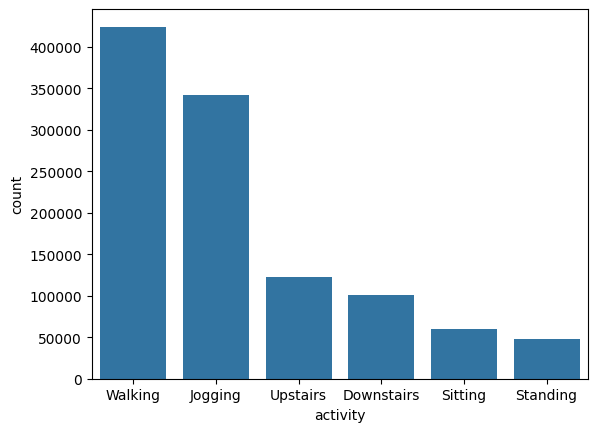

In [9]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

In [12]:
import numpy as np

def segments(df, time_steps, step, label_name):
    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X'].values[i:i+time_steps]
        ys = df['Y'].values[i:i+time_steps]
        zs = df['Z'].values[i:i+time_steps]
        
        # Finding the most frequent label within the segment
        segment_labels = df[label_name][i:i+time_steps].values
        label = np.bincount(segment_labels).argmax()
        
        segments.append([xs, ys, zs])
        labels.append(label)
    
    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)
    
    return reshaped_segments, labels

In [13]:
TIME_PERIOD = 80
STEP_DISTANCE = 40
LABEL = 'ActivityEncoded'
X_train, y_train = segments(df_train, TIME_PERIOD, STEP_DISTANCE, LABEL)
X_test, y_test = segments(df_test, TIME_PERIOD, STEP_DISTANCE, LABEL)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((20334, 80, 3), (20334,), (7118, 80, 3), (7118,))

In [15]:
y_train

array([0, 0, 0, ..., 4, 4, 4])

In [16]:
'''
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)

print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\n\nenc = OneHotEncoder(handle_unknown = "ignore", sparse = False)\nenc = enc.fit(y_train)\n\ny_train_hot = enc.transform(y_train)\ny_test_hot = enc.transform(y_test)\n\nprint(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)\n'

In [17]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [18]:
n_classes = 6

In [19]:
# CNN Model
def cnn(x_shape,
        n_classes,
        filters,
        fc_hidden_nodes,
        learning_rate=0.01, regularization_rate=0.01,
        metrics=None):
    if metrics is None:
        metrics = ['accuracy']
    dim_length = x_shape[1]  # number of samples in a time series
    dim_channels = x_shape[2]  # number of channels
    dim_output = n_classes
    weightinit = 'lecun_uniform'  # weight initialization
    m = Sequential()

    m.add(BatchNormalization(input_shape=(dim_length, dim_channels)))
    for filter_number in filters:
        m.add(Conv1D(filter_number, kernel_size=3, padding='same',
                     kernel_regularizer=l2(regularization_rate),
                     kernel_initializer=weightinit))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(Flatten())
    m.add(Dense(units=fc_hidden_nodes,
                kernel_regularizer=l2(regularization_rate),
                kernel_initializer=weightinit))  # Fully connected layer
    m.add(Activation('relu'))  # Relu activation
    m.add(Dense(units=dim_output, kernel_initializer=weightinit, kernel_regularizer=l2(regularization_rate)))
    m.add(BatchNormalization())
    m.add(Activation(out_activ))  # Final classification layer

    m.compile(loss=out_loss,
              optimizer=Adam(lr=learning_rate),
              metrics=metrics)

    return m


# CNN-LSTM Model
def cnn_lstm(x_shape,
             n_classes,
             n_hidden=128,
             learning_rate=0.01,
             n_steps=4,
             length=32,
             n_signals=9,
             regularization_rate=0.01,
             cnn_depth=3,
             lstm_depth=2,
             metrics=['accuracy']):
    """ CNN1D_LSTM version 1: Divide 1 window into several smaller frames, then apply CNN to each frame
    - Input data format: [None, n_frames, n_timesteps, n_signals]"""

    _input_shape = x_shape[1:]
    m = Sequential()

    m.add(Reshape((n_steps, length, n_signals), input_shape=_input_shape))
    m.add(BatchNormalization())
    m.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')))
    m.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu')))
    m.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    m.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu')))
    m.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu')))
    m.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    m.add(TimeDistributed(Flatten()))
    for _ in range(lstm_depth-1):
        m.add(LSTM(n_hidden, return_sequences=True,
                   kernel_regularizer=l2(regularization_rate)))
    m.add(LSTM(n_hidden))
    m.add(Dropout(0.5))
    m.add(Dense(100, activation='relu',
                kernel_regularizer=l2(regularization_rate)))
    m.add(Dense(n_classes, activation=out_activ))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)
    return m


# Vanilla LSTM Model
def vanilla_lstm(x_shape,
                 n_classes,
                 n_hidden=128,
                 learning_rate=0.01,
                 regularization_rate=0.01,
                 metrics=['accuracy']):
    """ Requires 3D data: [n_samples, n_timesteps, n_signals]"""
    _input_shape = x_shape[1:]
    m = Sequential()

    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(LSTM(n_hidden))
    m.add(Dropout(0.3))
    m.add(Dense(100, activation='relu'))
    m.add(Dense(n_classes, activation=out_activ, kernel_regularizer=l2(regularization_rate)))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate),
              metrics=metrics)
    return m


# Stacked LSTM Model
def stacked_lstm(x_shape,
                 n_classes,
                 n_hidden=128,
                 learning_rate=0.01,
                 regularization_rate=0.01,
                 depth=2,
                 metrics=['accuracy']):
    """ Require 3D data: [n_samples, n_timesteps, n_signals]"""
    _input_shape = x_shape[1:]
    dim_length = x_shape[1]  # number of samples in a time series
    dim_channels = x_shape[2]  # number of channels
    dim_output = n_classes
    m = Sequential()

    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(Dense(100, activation='relu', name='preprocess', kernel_regularizer=l2(regularization_rate)))
    m.add(LSTM(n_hidden, return_sequences=True, kernel_regularizer=l2(regularization_rate)))
    m.add(Dropout(0.5))
    m.add(LSTM(n_hidden))
    m.add(Dense(100, activation='relu'))
    m.add(Dense(dim_output, activation=out_activ, name="output"))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)
    return m


# BiLSTM Model
def bilstm(x_shape,
           n_classes,
           n_hidden=128,
           learning_rate=0.01,
           regularization_rate=0.01,
           merge_mode='concat',
           depth=2,
           metrics=['accuracy']):
    """ Requires 3D data: [n_samples, n_timesteps, n_features]"""

    _input_shape = x_shape[1:]
    m = Sequential()

    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(Bidirectional(LSTM(n_hidden), merge_mode=merge_mode))
    m.add(Dense(100, activation='relu', kernel_regularizer=l2(regularization_rate)))
    m.add(Dense(n_classes, activation=out_activ))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)

    return m

In [20]:
def ispl_inception(x_shape,
                   n_classes,
                   filters_number,
                   head_size,
                   num_heads,
                   ff_dim,
                   num_transformer_blocks,
                   mlp_units,
                   use_residual=True,
                   use_bottleneck=True,
                   network_depth=5,
                   max_kernel_size=20,
                   learning_rate=0.01,
                   bottleneck_size=32,
                   regularization_rate=0.01,
                   metrics=['accuracy'],
                   dropout=0,
                   mlp_dropout=0,
                   out_activ='softmax',
                   out_loss='categorical_crossentropy'):
    dim_length = x_shape[1]  # 시계열의 샘플 수
    dim_channels = x_shape[2]  # 채널 수
    weightinit = 'lecun_uniform'  # 가중치 초기화

    def inception_module(input_tensor, stride=1, activation='relu'):
        if use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=bottleneck_size,
                                     kernel_size=1,
                                     padding='same',
                                     activation=activation,
                                     kernel_initializer=weightinit,
                                     use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_sizes = [max_kernel_size // (2 ** i) for i in range(3)]
        conv_list = []

        for kernel_size in kernel_sizes:
            conv_list.append(Conv1D(filters=filters_number,
                                    kernel_size=kernel_size,
                                    strides=stride,
                                    padding='same',
                                    activation=activation,
                                    kernel_initializer=weightinit,
                                    kernel_regularizer=l2(regularization_rate),
                                    use_bias=False)(input_inception))

        max_pool_1 = MaxPooling1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_last = Conv1D(filters=filters_number,
                           kernel_size=1,
                           padding='same',
                           activation=activation,
                           kernel_initializer=weightinit,
                           kernel_regularizer=l2(regularization_rate),
                           use_bias=False)(max_pool_1)

        conv_list.append(conv_last)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def shortcut_layer(input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]),
                            kernel_size=1,
                            padding='same',
                            kernel_initializer=weightinit,
                            kernel_regularizer=l2(regularization_rate),
                            use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x
    
    def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
        # Attention and Normalization
        x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        res = x + inputs

        # Feed Forward Part
        x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
        x = Dropout(dropout)(x)
        x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        return x + res

    # 실제 모델 생성
    input_layer = Input((dim_length, dim_channels))
    x = BatchNormalization()(input_layer)
    input_res = x

    for depth in range(network_depth):
        x = inception_module(x)
        if use_residual and depth % 3 == 2:
            x = shortcut_layer(input_res, x)
            input_res = x
    
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
        
    x = GlobalAveragePooling1D()(x)
        
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)

    # 최종 분류 레이어
    output_layer = Dense(n_classes, activation=out_activ,
                         kernel_initializer=weightinit, kernel_regularizer=l2(regularization_rate))(x)

    # 모델 생성 및 컴파일
    m = Model(inputs=input_layer, outputs=output_layer)
    m.compile(loss=out_loss, optimizer=Adam(learning_rate=learning_rate, amsgrad=True), metrics=metrics)

    return m

In [21]:
use_residual = True
use_bottleneck = True
learning_rate = 0.0005
regularization_rate = 0.00593,
network_depth = 5
filters_number = 64
max_kernel_size = 68,
use_residual = 'use_residual', 
use_bottleneck = 'use_bottleneck'
out_loss = CategoricalCrossentropy(reduction=Reduction.AUTO, name='output_loss')
out_activ = 'softmax'

In [22]:
head_size=256,
num_heads=4,
ff_dim=4,
num_transformer_blocks=4,
mlp_units=[128],
mlp_dropout=0.4,
dropout=0.25

# Data Balancing

In [32]:
df= df.drop('activity',axis=1)
df

,user-id,timestamp,X,Y,Z,ActivityEncoded
0,33,49105962326000,-0.694638,12.680544,0.503953,1
1,33,49106062271000,5.012288,11.264028,0.953424,1
2,33,49106112167000,4.903325,10.882658,-0.081722,1
3,33,49106222305000,-0.612916,18.496431,3.023717,1
4,33,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...
1098199,19,131623331483000,9.000000,-1.570000,1.690000,4
1098200,19,131623371431000,9.040000,-1.460000,1.730000,4
1098201,19,131623411592000,9.080000,-1.380000,1.690000,4
1098202,19,131623491487000,9.000000,-1.460000,1.730000,4


In [33]:
from imblearn.over_sampling import SMOTE
#Smote()를 통한 OverSampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('ActivityEncoded', axis=1), df['ActivityEncoded'])

In [34]:
df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('ActivityEncoded', axis=1).columns),
                         pd.DataFrame({'ActivityEncoded': y_resampled})], axis=1)

<Axes: xlabel='ActivityEncoded', ylabel='count'>

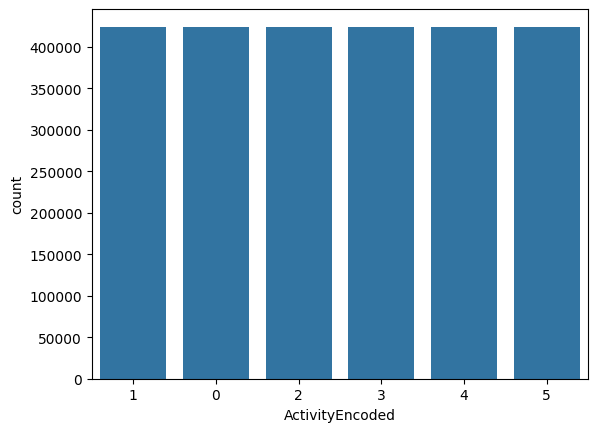

In [35]:
sns.countplot(x = "ActivityEncoded", data = df, order = df.ActivityEncoded.value_counts().index)

In [36]:
df_test = df[df['user-id'] > 27]
df_train = df[df['user-id'] <= 27]

In [37]:
X_train, y_train = segments(df_train, TIME_PERIOD, STEP_DISTANCE, LABEL)
X_test, y_test = segments(df_test, TIME_PERIOD, STEP_DISTANCE, LABEL)

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((46501, 80, 3), (46501,), (17156, 80, 3), (17156,))

In [39]:
model = ispl_inception(X_train.shape, n_classes, filters_number,
                       head_size=256,
                       num_heads=4,
                       ff_dim=4,
                       num_transformer_blocks=4,
                       mlp_units=[128],
                       network_depth=5,
                       use_residual=True,
                       use_bottleneck=True,
                       max_kernel_size=20,
                       learning_rate=0.01,
                       bottleneck_size=32,
                       regularization_rate=0.01,
                       metrics=['accuracy'])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 80, 3)]              0         []                            
                                                                                                  
 batch_normalization_7 (Bat  (None, 80, 3)                12        ['input_2[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 conv1d_34 (Conv1D)          (None, 80, 32)               96        ['batch_normalization_7[0][0]'
                                                                    ]                             
                                                                                            

                                                                                                  
 activation_8 (Activation)   (None, 80, 256)              0         ['batch_normalization_10[0][0]
                                                                    ']                            
                                                                                                  
 add_1 (Add)                 (None, 80, 256)              0         ['batch_normalization_11[0][0]
                                                                    ',                            
                                                                     'activation_8[0][0]']        
                                                                                                  
 activation_9 (Activation)   (None, 80, 256)              0         ['add_1[0][0]']               
                                                                                                  
 conv1d_50

                                                                                                  
 multi_head_attention_5 (Mu  (None, 80, 256)              1051904   ['tf.__operators__.add_9[0][0]
 ltiHeadAttention)                                                  ',                            
                                                                     'tf.__operators__.add_9[0][0]
                                                                    ']                            
                                                                                                  
 dropout_11 (Dropout)        (None, 80, 256)              0         ['multi_head_attention_5[0][0]
                                                                    ']                            
                                                                                                  
 layer_normalization_10 (La  (None, 80, 256)              512       ['dropout_11[0][0]']          
 yerNormal

                                                                                                  
 conv1d_67 (Conv1D)          (None, 80, 256)              1280      ['dropout_16[0][0]']          
                                                                                                  
 layer_normalization_15 (La  (None, 80, 256)              512       ['conv1d_67[0][0]']           
 yerNormalization)                                                                                
                                                                                                  
 tf.__operators__.add_15 (T  (None, 80, 256)              0         ['layer_normalization_15[0][0]
 FOpLambda)                                                         ',                            
                                                                     'tf.__operators__.add_14[0][0
                                                                    ]']                           
          

In [41]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train, num_classes)
print("y_train shape: ", y_train_hot.shape)

y_train shape:  (46501, 6)


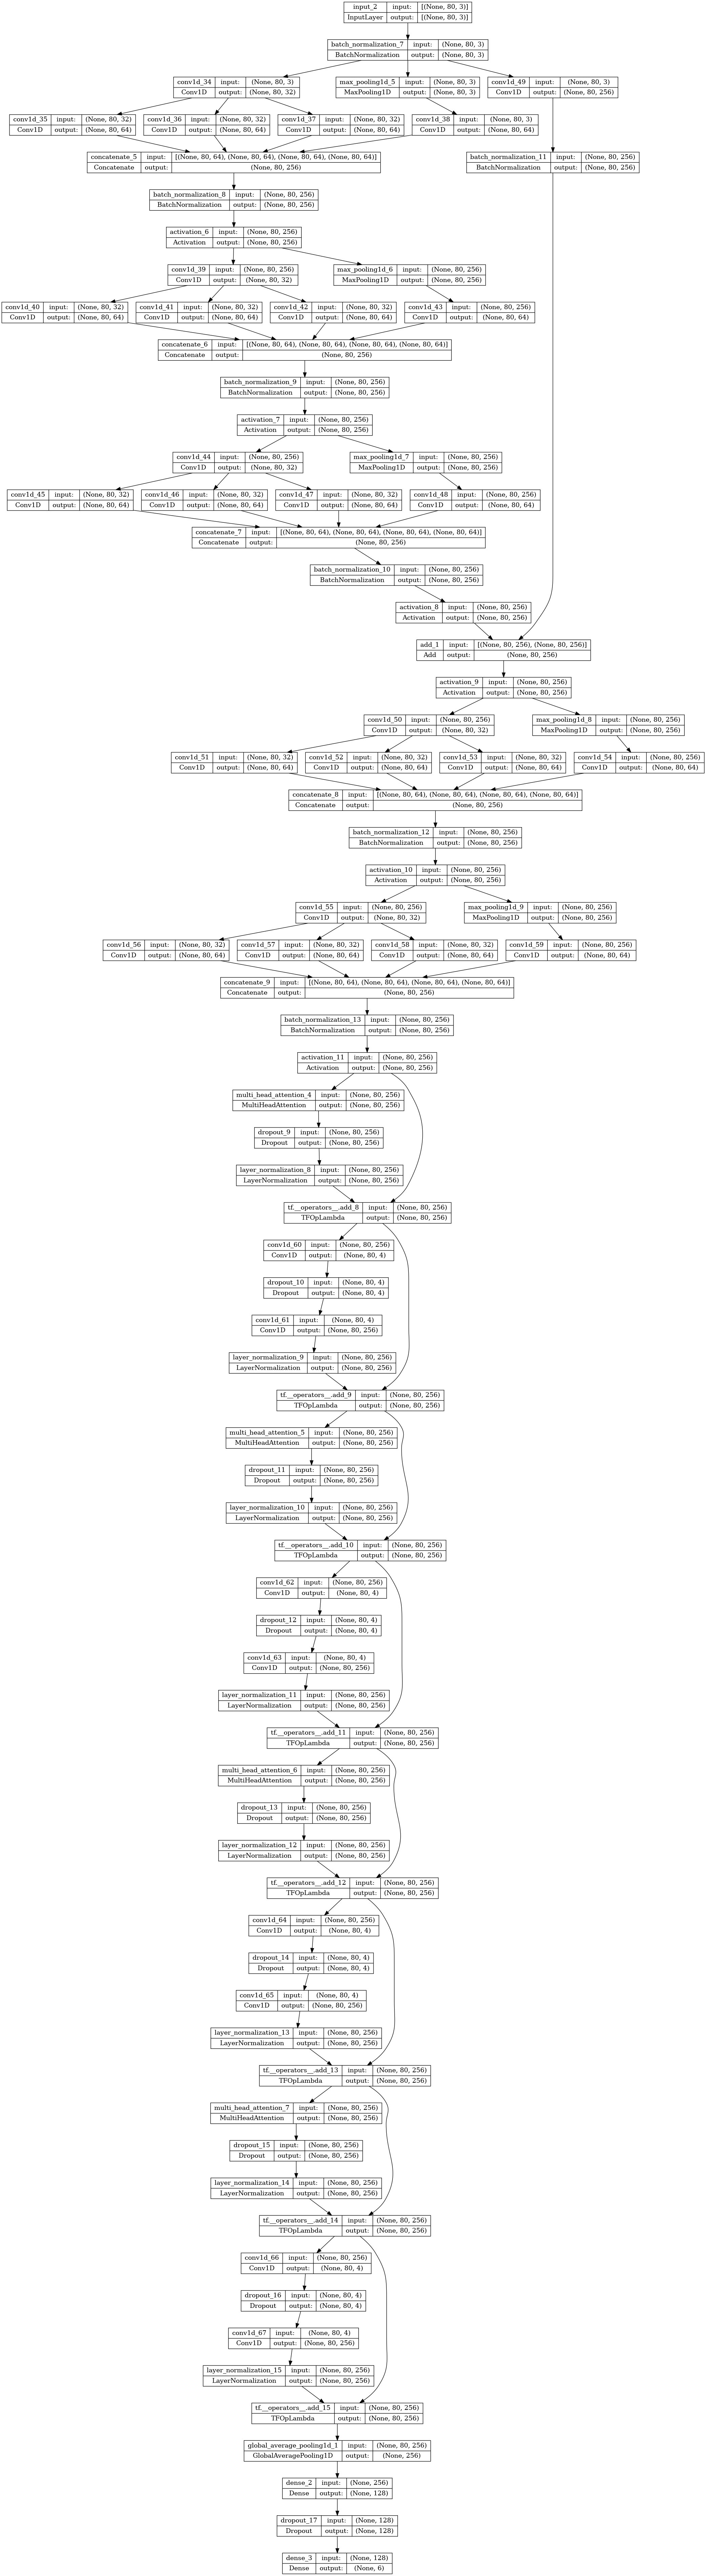

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [43]:
validation_split = 0.1
history = model.fit(X_train, y_train_hot, batch_size= 192, epochs=100, verbose=True,  validation_split=validation_split)

Epoch 1/100
218/218 [==============================] - 26s 55ms/step - loss: 6.3539 - accuracy: 0.6982 - val_loss: 4.8007 - val_accuracy: 0.0073
Epoch 2/100
218/218 [==============================] - 12s 54ms/step - loss: 2.7119 - accuracy: 0.7535 - val_loss: 27.3843 - val_accuracy: 0.0000e+00
Epoch 3/100
218/218 [==============================] - 11s 51ms/step - loss: 3.3363 - accuracy: 0.6697 - val_loss: 4.1303 - val_accuracy: 0.0000e+00
Epoch 4/100
218/218 [==============================] - 11s 52ms/step - loss: 1.7541 - accuracy: 0.7933 - val_loss: 1.2420 - val_accuracy: 1.0000
Epoch 5/100
218/218 [==============================] - 12s 55ms/step - loss: 1.3193 - accuracy: 0.8097 - val_loss: 5.0020 - val_accuracy: 0.0000e+00
Epoch 6/100
218/218 [==============================] - 13s 60ms/step - loss: 1.2547 - accuracy: 0.8236 - val_loss: 4.8639 - val_accuracy: 0.0000e+00
Epoch 7/100
218/218 [==============================] - 12s 54ms/step - loss: 3.6994 - accuracy: 0.7583 - val_loss

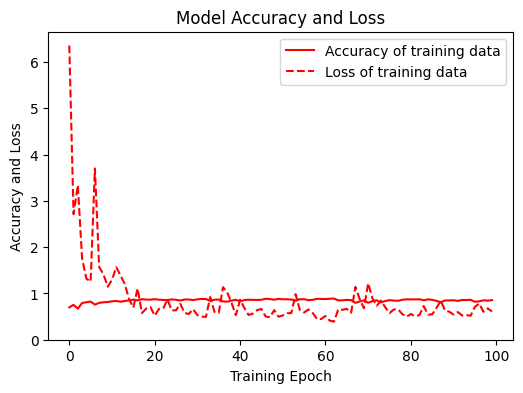

537/537 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2751
           1       0.97      0.81      0.89      2463
           2       0.21      0.29      0.25      2654
           3       0.54      0.79      0.64      2926
           4       0.74      1.00      0.85      3026
           5       0.98      0.21      0.35      3336

    accuracy                           0.64     17156
   macro avg       0.72      0.65      0.63     17156
weighted avg       0.73      0.64      0.62     17156



In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

y_pred_test = model.predict(X_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
print(classification_report(y_test, max_y_pred_test))